## 01 - General Exploratory Data Analysis
**Source: King County Housing Dataset on two tables from a database**


**1.1 Setup and Data Loading**

In [68]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-whitegrid')

**1.2 Table Join (from Database)**

The dataset was created by joining two tables from the EDA schema in the database:
- `house_data` - Contains property characteristics
- `sales_data` - Contains sales information (date, price)

SQL Join used in DBeaver:
```sql
SELECT 
    h.*,
    s.date,
    s.price
FROM eda.house_data h
LEFT JOIN eda.sales_data s 
    ON h.id = s.house_id;
```

The joined data was exported as `eda.csv` and placed in the `data/` folder.

In [69]:
# Load the joined data
df = pd.read_csv('../data/eda.csv')

print(f"Dataset Shape: {df.shape[0]} houses, {df.shape[1]} columns")

Dataset Shape: 21597 houses, 23 columns


In [70]:
# First look at the data
df.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id,id.1
0,7129300520,3.0,1.00,1180.0,5650.0,1.0,NaN,0.0,3,7,1180.0,0.0,1955,0.0,98178,47.5112,-122.257,1340.0,5650.0,2014-10-13,221900.0,7129300520,1
1,6414100192,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3,7,2170.0,400.0,1951,19910.0,98125,47.7210,-122.319,1690.0,7639.0,2014-12-09,538000.0,6414100192,2
2,5631500400,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3,6,770.0,0.0,1933,NaN,98028,47.7379,-122.233,2720.0,8062.0,2015-02-25,180000.0,5631500400,3
3,2487200875,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5,7,1050.0,910.0,1965,0.0,98136,47.5208,-122.393,1360.0,5000.0,2014-12-09,604000.0,2487200875,4
4,1954400510,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3,8,1680.0,0.0,1987,0.0,98074,47.6168,-122.045,1800.0,7503.0,2015-02-18,510000.0,1954400510,5


**1.3 Data Overview**

In [71]:
# Data types and non-null counts
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   bedrooms       21597 non-null  float64
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  float64
 4   sqft_lot       21597 non-null  float64
 5   floors         21597 non-null  float64
 6   waterfront     19206 non-null  float64
 7   view           21534 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  float64
 11  sqft_basement  21145 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17749 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  float64
 18  sqft_l

In [72]:
# Basic statistics ex. remnant ID columns from SQL, removed later in 1.5
df[[c for c in df.columns if c not in ['id','id.1']]].describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,house_id
count,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19206.000000,21534.000000,21597.000000,21597.000000,21597.000000,21145.000000,21597.000000,17749.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04,2.159700e+04
mean,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007602,0.233863,3.409825,7.657915,1788.596842,291.857224,1970.999676,836.650516,98077.951845,47.560093,-122.213983,1986.620318,12758.283512,5.402966e+05,4.580474e+09
std,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086858,0.765686,0.650546,1.173200,827.759761,442.490863,29.375234,4000.110554,53.513072,0.138552,0.140724,685.230472,27274.441950,3.673681e+05,2.876736e+09
min,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04,1.000102e+06
25%,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,3.220000e+05,2.123049e+09
50%,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,4.500000e+05,3.904930e+09
75%,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05,7.308900e+09
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,20150.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06,9.900000e+09


bedrooms = 33? must be a typo!

**1.4 Missing Values Analysis**

In [73]:
# Missing values
missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(2)

missing_df = pd.DataFrame({
    'Missing': missing,
    'Percentage': missing_pct
})

print("Columns with missing values:")
missing_df[missing_df['Missing'] > 0].sort_values('Missing', ascending=False)

Columns with missing values:


,Missing,Percentage
yr_renovated,3848,17.82
waterfront,2391,11.07
sqft_basement,452,2.09
view,63,0.29


In [74]:
# Are there duplicates , i.e.  houses sold multiple times?
duplicates = df.duplicated(subset=['house_id']).sum()
print(f"Houses sold more than once: {duplicates}")
print(f"Max times a single house was sold: {df['house_id'].value_counts().max()}")

Houses sold more than once: 177
Max times a single house was sold: 3


**1.5 Data Cleaning**

Cleaning Strategy:

| Issue | Solution |
|-------|----------|
| `bedrooms` outlier (33) | typo -> Remove row  |
| `waterfront` NaN | Fill with 0 (assume no waterfront) |
| `view` NaN | Fill with 0 (assume no special view) |
| `sqft_basement` NaN | Fill with 0 (assume no basement) |
| `yr_renovated` NaN | Fill with 0 (no renovation) |
| `date` as string | Convert to datetime |
| `id`, `id.1` columns | Remove (not needed) |

In [75]:
# Create df_clean by .copy, keep orignal df
df_clean = df.copy()

# Drop unnecessary ID columns
df_clean = df_clean.drop(columns=['id.1', 'id'])

# Convert date and extract month/year
df_clean['date'] = pd.to_datetime(df_clean['date'])
df_clean['month'] = df_clean['date'].dt.month
df_clean['year'] = df_clean['date'].dt.year

print(f"Data range: {df_clean['date'].min().date()} to {df_clean['date'].max().date()}")

Data range: 2014-05-02 to 2015-05-27


In [76]:
# Remove bedroom outlier
outl = df_clean.loc[df_clean['bedrooms'] > 11,'house_id']
print(f"{outl}")
df_clean = df_clean[df_clean['bedrooms'] <= 11]

15856    2402100895
Name: house_id, dtype: int64


In [77]:
# Fill missing values
df_clean['waterfront'] = df_clean['waterfront'].fillna(0)
df_clean['view'] = df_clean['view'].fillna(0)
df_clean['sqft_basement'] = df_clean['sqft_basement'].fillna(0)
df_clean['yr_renovated'] = df_clean['yr_renovated'].fillna(0)

In [78]:
# Create price per sqft feature
df_clean['price_per_sqft'] = df_clean['price'] / df_clean['sqft_living']

# Verify cleaning
print(f"Clean dataset: {df_clean.shape}")
print(f"Missing values: {df_clean.isnull().sum().sum()}")

Clean dataset: (21596, 24)
Missing values: 0


In [79]:
# Save cleaned data for other notebooks
df_clean.to_csv('../data/eda_clean.csv', index=False)
print("Saved: data/eda_clean.csv")

Saved: data/eda_clean.csv


---
## 2. Hypotheses for EDA

3 hypotheses for EDA:

| Research Question | Hypothesis | Variables |
|-------------------|------------|----------|
| Does location affect price? | **H1**: The closer a house is to Seattle Downtown, the higher the price | lat, long, price |
| Does renovation affect price? | **H3**: If a house was renovated, then it sells for a higher price | yr_renovated, price |
| Does quality affect price? | **H4**: The higher the grade, the higher the price | grade, price |

**Geographic Context**

**King County** is located in Washington State, USA. The county seat is **Seattle**, which is also the largest city and economic center of the region.

*Source: [Wikipedia - King County, Washington](https://en.wikipedia.org/wiki/King_County,_Washington)*

For distance calculations, we use Seattle Downtown coordinates:
- Latitude: 47.6062
- Longitude: -122.3321

---
## 3. Exploratory Data Analysis

**3.1 Price Distribution**

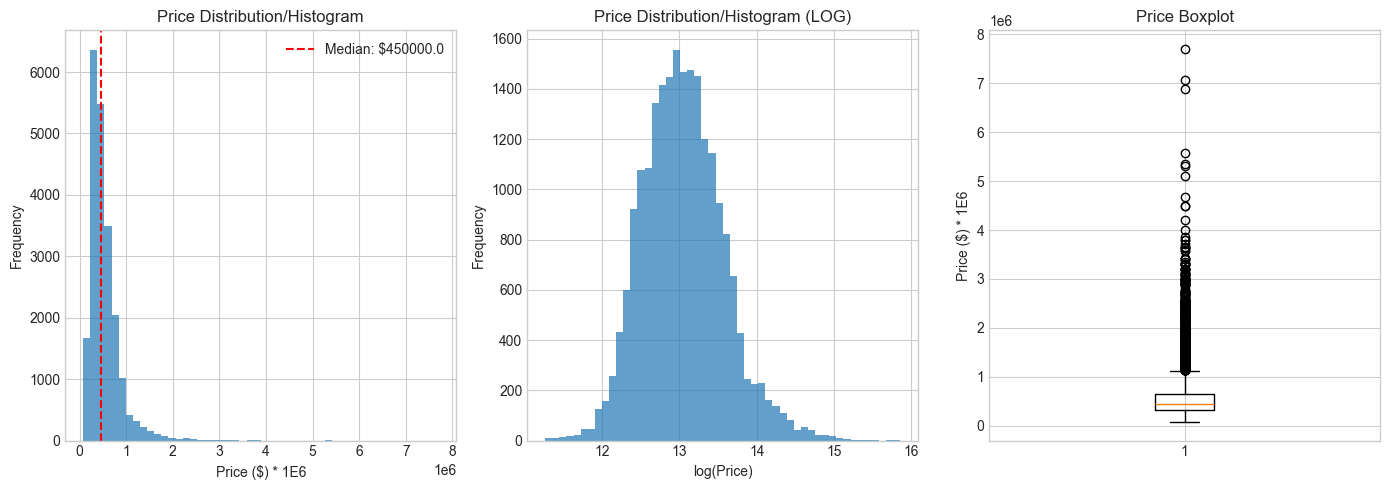

In [112]:
# Price distribution
fig, axes = plt.subplots(1, 3, figsize=(14, 5))

# Histogram
axes[0].hist(df_clean['price'], bins=50,  alpha=0.7)
axes[0].set_xlabel('Price ($) * 1E6')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Price Distribution/Histogram')
axes[0].axvline(df_clean['price'].median(), color='red', linestyle='--', 
                label=f'Median: ${df_clean["price"].median()}')
axes[0].legend()

# right-skewed! ->
# Introduce logarithm ...
df_clean['log_price']=np.log(df_clean['price'])

# Histogram log
axes[1].hist(df_clean['log_price'], bins=50,  alpha=0.7)
axes[1].set_xlabel('log(Price)')
axes[1].set_ylabel('Frequency')
#axes[1].set_xscale('log')
axes[1].set_title('Price Distribution/Histogram (LOG)')

# Boxplot
axes[2].boxplot(df_clean['price'])
axes[2].set_ylabel('Price ($) * 1E6')
axes[2].set_title('Price Boxplot')
plt.tight_layout()
plt.show()

In [133]:
#outlier definition (price) using IQR method 
#(alternatively z-scoring but bases on MEAN!):

Q1 = df_clean.log_price.quantile(0.25)
Q3 = df_clean.log_price.quantile(0.75)
IQR = Q3 - Q1

lower_bound_log = Q1 - 1.5 * IQR
upper_bound_log = Q3 + 1.5 * IQR #+-1.5: by experience 
df_outl=df_clean.query('log_price < @lower_bound_log or log_price > @upper_bound_log')

# Transform back to original price scale for print
lower_bound_price = np.exp(lower_bound_log)
upper_bound_price = np.exp(upper_bound_log)

# Report outlier statistics
print("Outlier Detection (IQR Method on Log-Prices):")
print(f"  Lower bound: ${lower_bound_price:>12,.0f}")
print(f"  Upper bound: ${upper_bound_price:>12,.0f}")
print(f"  Outliers:    {df_outl.shape[0]:>6,d} of {df_clean.shape[0]:>6,d} ({100*df_outl.shape[0]/df_clean.shape[0]:>5.2f}%)")
n_upper = (df_outl['price'] > upper_bound_price).sum()
print(f"Upper outliers (> ${upper_bound_price:,.0f}): {n_upper}")
# Price statistics
print("Price Statistics:")
print(f"  Min:    ${df_clean['price'].min():>12,.0f}")
print(f"  25%:    ${df_clean['price'].quantile(0.25):>12,.0f}")
print(f"  Median: ${df_clean['price'].median():>12,.0f}")
print(f"  75%:    ${df_clean['price'].quantile(0.75):>12,.0f}")
print(f"  Max:    ${df_clean['price'].max():>12,.0f}")

Outlier Detection (IQR Method on Log-Prices):
  Lower bound: $     113,580
  Upper bound: $   1,828,586
  Outliers:       333 of 21,596 ( 1.54%)
Upper outliers (> $1,828,586): 282
Price Statistics:
  Min:    $      78,000
  25%:    $     322,000
  Median: $     450,000
  75%:    $     645,000
  Max:    $   7,700,000


The price distribution is right-skewed with a median of ~$450K. There are significant outliers above $1.8M.

**3.2 Monthly statsistics**

In [160]:

import calendar
# Monthly analysis
monthly_stats = df_clean.groupby('month').agg({
    'price': ['mean', 'median', 'count']
}).round(0)
monthly_stats.columns = ['Average', 'Median', 'Count']
print(f"The strongest month to acheive best average price is {calendar.month_name[monthly_stats['Average'].idxmax()]} while the weakest is {calendar.month_name[monthly_stats['Average'].idxmin()]}")


The strongest month to acheive best average price is April while the weakest is February


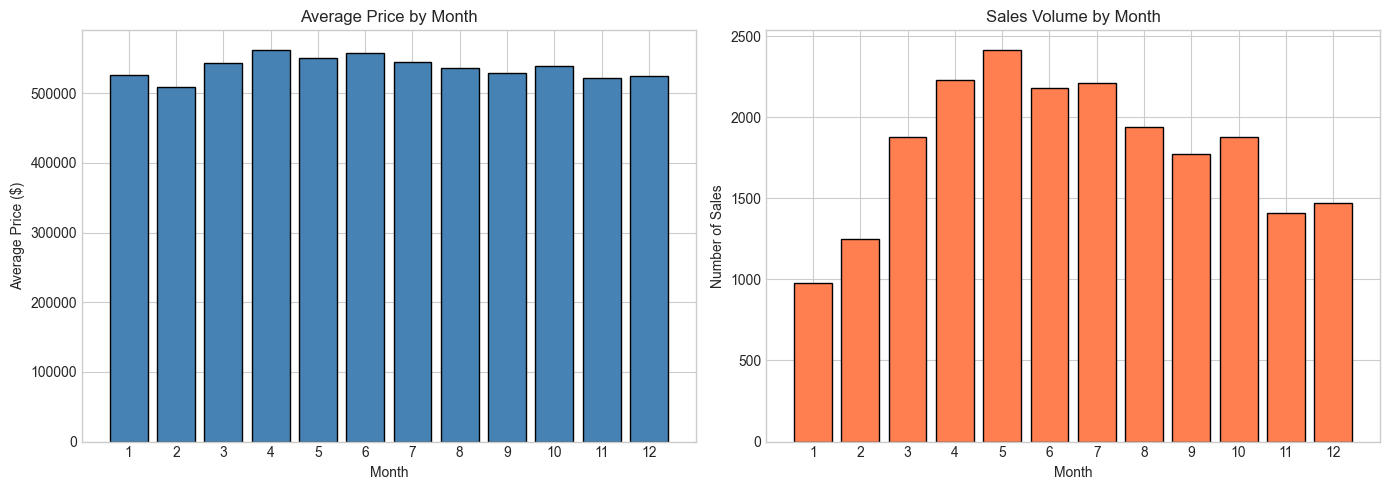

In [ ]:
# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
colors=['steelblue' if ]
axes[0].bar(monthly_stats.index, monthly_stats['Average'], 
            color='steelblue', edgecolor='black')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Average Price ($)')
axes[0].set_title('Average Price by Month')
axes[0].set_xticks(range(1, 13))

axes[1].bar(monthly_stats.index, monthly_stats['Count'], 
            color='coral', edgecolor='black')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Number of Sales')
axes[1].set_title('Sales Volume by Month')
axes[1].set_xticks(range(1, 13))

plt.tight_layout()
plt.show()

**Observation**: Spring/Summer months (April-July) show both higher prices and more sales activity. Winter months have reduced market activity.

---
## 4. Hypothesis: Distance to Seattle Downtown affects Price 

Calculate distance to Seattle Downtown for each house and correlate with price.

In [ ]:
# Seattle Downtown coordinates (source: Wikipedia)
SEATTLE_LAT = 47.6062
SEATTLE_LONG = -122.3321

# Calculate distance to Seattle Downtown, approximation
# 
df_clean['dist_to_seattle'] = np.sqrt(
    (df_clean['lat'] - SEATTLE_LAT)**2 + 
    (df_clean['long'] - SEATTLE_LONG)**2
)

print(f"Distance range: {df_clean['dist_to_seattle'].min():.3f} to {df_clean['dist_to_seattle'].max():.3f} degrees")

Distance range: 0.013 to 1.023 degrees


In [165]:
# Correlation: Distance vs Price
correlation = df_clean['dist_to_seattle'].corr(df_clean['price'])
print(f"Correlation (distance to Seattle vs price): {correlation:.3f}")

Correlation (distance to Seattle vs price): -0.191


There is a neg. correlation between distance to the center and price

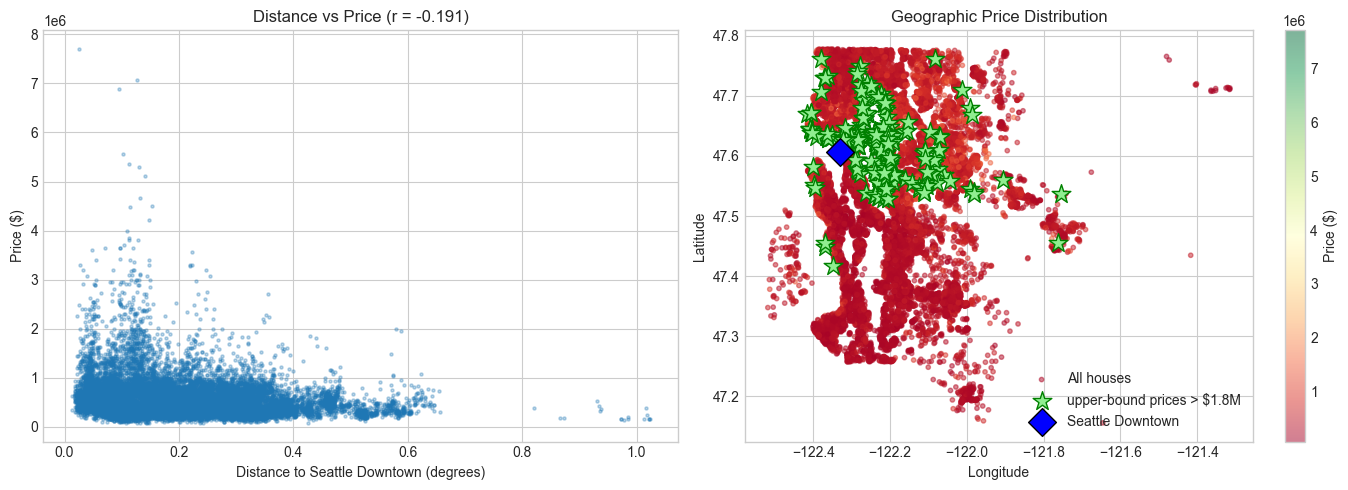

In [172]:
# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scatter plot: Distance vs Price
axes[0].scatter(df_clean['dist_to_seattle'], df_clean['price'], alpha=0.3, s=5)
axes[0].set_xlabel('Distance to Seattle Downtown (degrees)')
axes[0].set_ylabel('Price ($)')
axes[0].set_title(f'Distance vs Price (r = {correlation:.3f})')

# Geographic plot with Seattle marker
scatter = axes[1].scatter(df_clean['long'], df_clean['lat'], 
                          c=df_clean['price'], cmap='RdYlGn', alpha=0.5, s=10, label="All houses")


outliers = df_clean[df_clean['price'] > upper_bound_price]
axes[1].scatter(outliers['long'], outliers['lat'], c='lightgreen', s=200, marker='*', 
                label='upper-bound prices > $1.8M', edgecolors='green', zorder=5)
axes[1].scatter(SEATTLE_LONG, SEATTLE_LAT, c='blue', s=200, marker='D', 
                label='Seattle Downtown', edgecolors='black', zorder=5)
axes[1].set_xlabel('Longitude')
axes[1].set_ylabel('Latitude')
axes[1].set_title('Geographic Price Distribution')
axes[1].legend()
plt.colorbar(scatter, ax=axes[1], label='Price ($)')

plt.tight_layout()
plt.show()

In [87]:
# Compare price by distance groups
df_clean['distance_group'] = pd.cut(df_clean['dist_to_seattle'], 
                                     bins=4, 
                                     labels=['Very Close', 'Close', 'Far', 'Very Far'])

distance_comparison = df_clean.groupby('distance_group', observed=True).agg({
    'price': ['mean', 'median', 'count']
}).round(0)
distance_comparison.columns = ['Average', 'Median', 'Count']

print("Price by Distance to Seattle:")
distance_comparison

Price by Distance to Seattle:


,Average,Median,Count
distance_group,,,
Very Close,577256.0,475000.0,15244
Close,457027.0,393500.0,5938
Far,379351.0,321000.0,396
Very Far,244556.0,172500.0,18


**H1 Result**
The correlation between distance to Seattle and price is negative (r ≈ -0.2), confirming that houses closer to downtown lead to higher prices.

The geographic visualization reveals that high-price areas cluster not only near downtown but also along waterfronts. Seattle has extensive water bodies (Puget Sound, Lake Washington, bays, harbors) that create gaps in the housing map, while properties bordering them form secondary price hotspots - indicating that waterfront proximity is an independent price driver beyond downtown distance.

**Hypothesis H1 verified** - Location relative to Seattle Downtown does affect house prices, but there are also other price drivers probalby closeness to waterfront etc

---
**4.2 H3: Renovation  sells for a higher price**

Compare prices of renovated vs. non-renovated houses.

In [ ]:
# Count renovated vs non-renovated, converted to type:iteger
df_clean['is_renovated'] = (df_clean['yr_renovated'] > 0).astype(int)

renovation_counts = df_clean['is_renovated'].value_counts()
print(f"Non-renovated: {renovation_counts[0]} ({renovation_counts[0]/len(df_clean)*100:.1f}%)")
print(f"Renovated: {renovation_counts[1]} ({renovation_counts[1]/len(df_clean)*100:.1f}%)")

Non-renovated: 20852 (96.6%)
Renovated: 744 (3.4%)


In [173]:
# Compare prices
renovation_comparison = df_clean.groupby(by='is_renovated').agg({
    'price': ['mean', 'median', 'std', 'count']
}).round(0)
renovation_comparison.columns = ['Average', 'Median', 'Std Dev', 'Count']
renovation_comparison.index = ['Not Renovated', 'Renovated']

print("Price Comparison - Renovated vs Non-Renovated:")
renovation_comparison

Price Comparison - Renovated vs Non-Renovated:


,Average,Median,Std Dev,Count
Not Renovated,532135.0,449000.0,351902.0,20852
Renovated,768902.0,607502.0,627126.0,744


In [90]:
# Calculate price difference
avg_not_renovated = df_clean[df_clean['is_renovated'] == 0]['price'].mean()
avg_renovated = df_clean[df_clean['is_renovated'] == 1]['price'].mean()
price_diff = avg_renovated - avg_not_renovated
price_diff_pct = (price_diff / avg_not_renovated) * 100

print(f"\nPrice difference (Renovated - Not Renovated):")
print(f"  Absolute: ${price_diff:,.0f}")
print(f"  Relative: +{price_diff_pct:.1f}%")


Price difference (Renovated - Not Renovated):
  Absolute: $236,767
  Relative: +44.5%


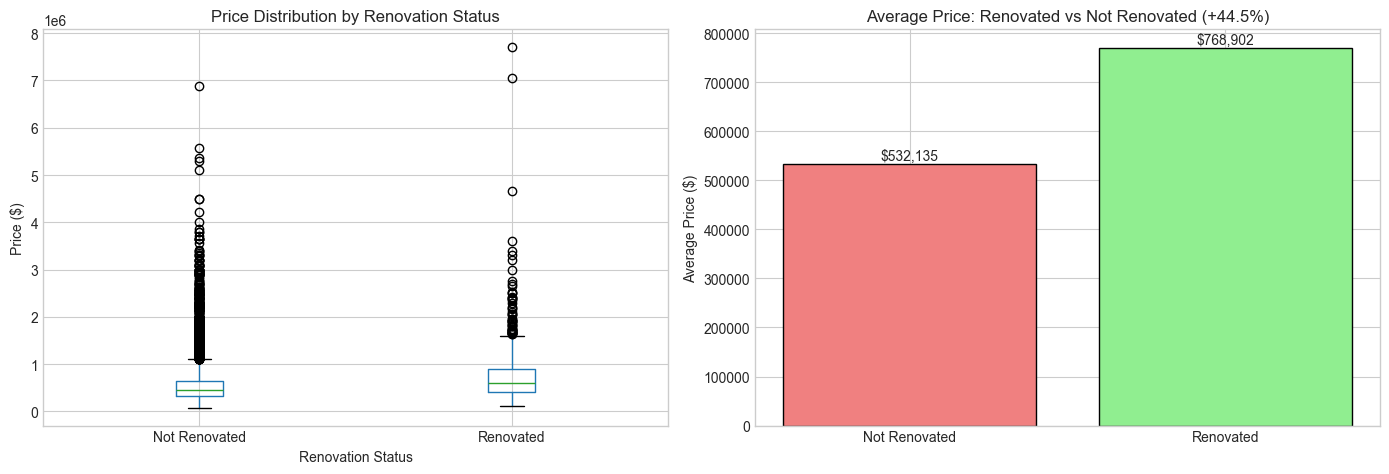

In [91]:
# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Boxplot comparison
df_clean.boxplot(column='price', by='is_renovated', ax=axes[0])
axes[0].set_xticklabels(['Not Renovated', 'Renovated'])
axes[0].set_xlabel('Renovation Status')
axes[0].set_ylabel('Price ($)')
axes[0].set_title('Price Distribution by Renovation Status')
plt.suptitle('')  # Remove automatic title

# Bar chart of averages
labels = ['Not Renovated', 'Renovated']
means = [avg_not_renovated, avg_renovated]
colors = ['lightcoral', 'lightgreen']
axes[1].bar(labels, means, color=colors, edgecolor='black')
axes[1].set_ylabel('Average Price ($)')
axes[1].set_title(f'Average Price: Renovated vs Not Renovated (+{price_diff_pct:.1f}%)')

# Add value labels on bars
for i, v in enumerate(means):
    axes[1].text(i, v + 10000, f'${v:,.0f}', ha='center')

plt.tight_layout()
plt.show()

**H3 Result**

Renovated houses have a significantly **higher average price** (+~$200K, ~40% increase).


---
## 5. Additional Exploration

**5.1 Geographic Analysis by Zipcode**

In [92]:
# Price by zipcode
zipcode_stats = df_clean.groupby('zipcode').agg({
    'price': ['mean', 'median', 'count']
}).round(0)
zipcode_stats.columns = ['Average', 'Median', 'Count']
zipcode_stats = zipcode_stats.sort_values('Median', ascending=False)

print("Top 10 Most Expensive Zipcodes:")
zipcode_stats.head(10)

Top 10 Most Expensive Zipcodes:


,Average,Median,Count
zipcode,,,
98039,2161300.0,1895000.0,50
98004,1356524.0,1150000.0,317
98040,1194874.0,993750.0,282
98112,1096239.0,915000.0,269
98005,810290.0,765475.0,168
98006,859939.0,760184.0,498
98119,849715.0,744975.0,184
98075,790735.0,739999.0,359
98109,880078.0,736000.0,109


In [93]:
print("\nBottom 5 Cheapest Zipcodes:")
zipcode_stats.tail(5)


Bottom 5 Cheapest Zipcodes:


,Average,Median,Count
zipcode,,,
98188,289078.0,264000.0,136
98001,281195.0,260000.0,361
98032,251296.0,249000.0,125
98002,234284.0,235000.0,199
98168,240328.0,235000.0,269


**5.2 Quality Factors (Grade)**

In [94]:
# Price by grade
grade_stats = df_clean.groupby('grade').agg({
    'price': ['mean', 'count']
}).round(0)
grade_stats.columns = ['Average Price', 'Count']
grade_stats

,Average Price,Count
grade,,
3,262000.0,1
4,212002.0,27
5,248524.0,242
6,301917.0,2038
7,402568.0,8973
8,542987.0,6065
9,773738.0,2615
10,1072347.0,1134
11,1497792.0,399


In [ ]:
# Correlation analysis
corr_cols = ['price', 'sqft_living', 'grade', 'bathrooms', 'bedrooms', 
             'condition', 'view', 'dist_to_seattle', 'is_renovated']
#correlates with price, descending:
correlations = df_clean[corr_cols].corr()['price'].sort_values(ascending=False)

print("Correlation with Price:")
print(correlations)

Correlation with Price:
price              1.000000
sqft_living        0.701929
grade              0.667964
bathrooms          0.525915
view               0.393502
bedrooms           0.315961
is_renovated       0.117546
condition          0.036031
dist_to_seattle   -0.191316
Name: price, dtype: float64


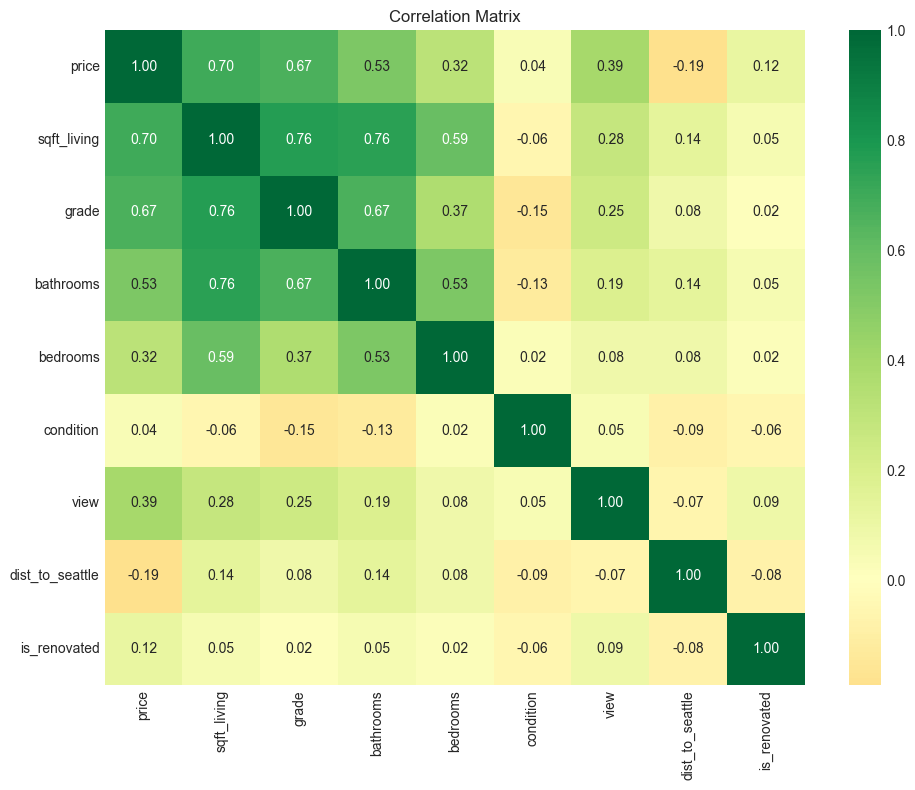

In [96]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
corr_matrix = df_clean[corr_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', center=0, fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

---
## 6. Key Insights Summary

**INSIGHT 1: Seasonal Timing Matters**
- Spring/Summer (April-July) shows higher prices (max price=April) and more sales
- Max sells in May with ~1,900 transactions
- Winter months show reduced activity

**INSIGHT 2: Distance to Seattle Affects Price (GEOGRAPHIC)**
- Hypothesis H1 confirmed: Negative correlation (r ≈ -0.2) between distance to Seattle and price
- Houses closer to Seattle Downtown command higher prices
- Significant price variation between zipcodes (from ~$235K to ~$1.1M median)

**INSIGHT 3: Renovation Increases Sale Price**
- Hypothesis H3 confirmed: Renovated houses sell for ~40% more on average
- Only ~4% of houses have been renovated
- Correlation does not prove causation (confounding factors possible)

**INSIGHT 4: Quality Grade Strongly Drives Price**
- Grade has highest correlation with price after sqft_living
- Each grade level corresponds to significant price increase
- Most houses are grade 7-8

---
*Next: See `02_client_selection.ipynb` for client choice*